# Source des donnees et bibliographie


https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

https://raw.githubusercontent.com/maelfabien/

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
https://www.cairn.info/revue-de-l-ofce-2003-3-page-203.htm

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

https://www.statsmodels.org/stable/statespace.html

https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html

https://towardsdatascience.com/a-bayesian-approach-to-time-series-forecasting-d97dd4168cb7

# Importation des libraries

In [38]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd 
import random
import math
from scipy.stats import expon
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from pandas import read_csv
from pandas.plotting import autocorrelation_plot

#from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn')
%matplotlib inline 

# Preprocessing  data

## load data

Nous travaillons avec les donnees publiees sur le site du ministere de la sante du senegal 

In [2]:
#df = pd.read_csv("https://raw.githubusercontent.com/maelfabien/COVID-19-Senegal/master/COVID_Dakar.csv",sep=";" )
#df.tail()
df = pd.read_csv("COVID_Senegal.csv",sep=";" )
df.tail()


Date  Positif  Negatif  Age  Homme  Femme  Décédé  Guéri  \
1189  30.03.20        0        1  NaN    NaN    NaN     NaN    NaN   
1190  30.03.20        0        1  NaN    NaN    NaN     NaN    NaN   
1191  30.03.20        0        1  NaN    NaN    NaN     NaN    NaN   
1192  30.03.20        0        1  NaN    NaN    NaN     NaN    NaN   
1193  30.03.20        0        1  NaN    NaN    NaN     NaN    NaN   

     Nationalité Resident Senegal Ville Facteur Source/Voyage Hopital  \
1189         NaN              NaN   NaN     NaN           NaN     NaN   
1190         NaN              NaN   NaN     NaN           NaN     NaN   
1191         NaN              NaN   NaN     NaN           NaN     NaN   
1192         NaN              NaN   NaN     NaN           NaN     NaN   
1193         NaN              NaN   NaN     NaN           NaN     NaN   

      Temps Hospitalisation (j)  
1189                        NaN  
1190                        NaN  
1191                        NaN  
1192                        NaN  
1193                        NaN

## processing data

Les donnees sont dispatchees dans trois categories : cas confirmes, cas deces et cas gueri

In [3]:
confirmed_df = df[df['Positif']==1]
confirmed = confirmed_df[['Date', 'Positif']]
confirmed_cases= confirmed[['Date', 'Positif']].groupby("Date").sum()

deaths_df = df[df['Décédé']==1]
deaths = deaths_df[['Date', 'Décédé']]
deaths_cases= deaths[['Date', 'Décédé']].groupby("Date").sum()

recoveries_df = df[df['Guéri']==1]
recoveries = recoveries_df[['Date', 'Guéri']]
recoveries_cases= recoveries[['Date', 'Guéri']].groupby("Date").sum()


negatif_df = df[df['Negatif']==1  ]
negatif = negatif_df[['Date', 'Negatif']]
negatif_cases=negatif[['Date', 'Negatif']].groupby("Date").sum()


## Descriptif Analysis

Dans la premiere partie, nous regardons la relation entre le nombre de tests effectues par jour et le nombre 
de cas positifs. 

In [11]:
test1 = pd.DataFrame(confirmed_cases)
test2 = pd.DataFrame(negatif_cases)
total_cases = pd.concat([test1, test2], axis=1)
total_cases = total_cases.fillna(0)
total_cases['Negatif']
total = total_cases['Positif'] + total_cases['Negatif']
#prop = total_cases['Positif']/ total
#total_cases
#total

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


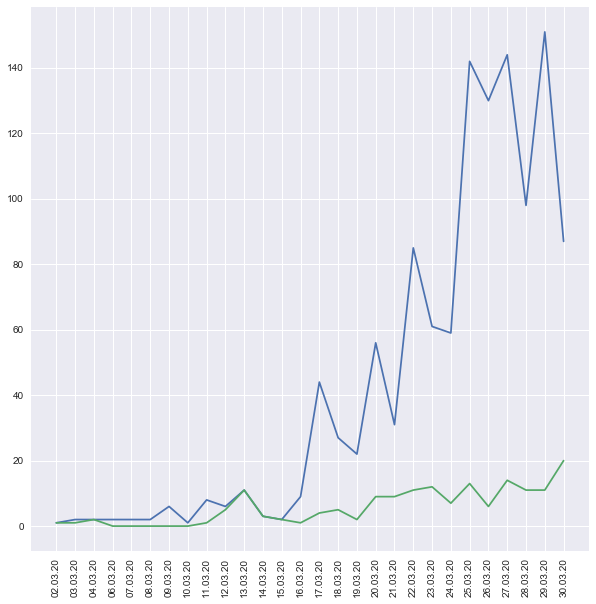

In [5]:
plt.figure(figsize=(10,10))
plt.plot(total)
plt.plot(total_cases['Positif'])
plt.xticks(rotation = 90)
plt.show()

Cette figure resume le nombre de tests et le nombre de cas confirmes

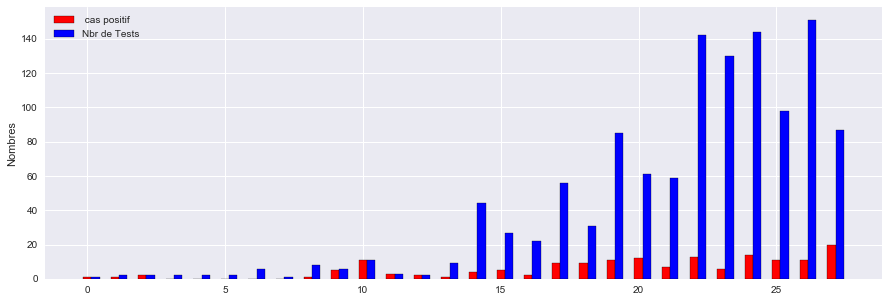

In [6]:
plt.figure(figsize=(15,5))
# width of the bars
barWidth = 0.3
# The x position of bars
r1 = np.arange(len(total_cases['Positif']))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1,total_cases['Positif'], width = barWidth, color = 'red', edgecolor = 'black', capsize=7, label=' cas positif')
 
# Create cyan bars
plt.bar(r2, total, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Nbr de Tests')
 
# general layout
#plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C'])
plt.ylabel('Nombres')
plt.legend()
 
# Show graphic
plt.show()

On regarde le nombre cumulatif des cas confirmes

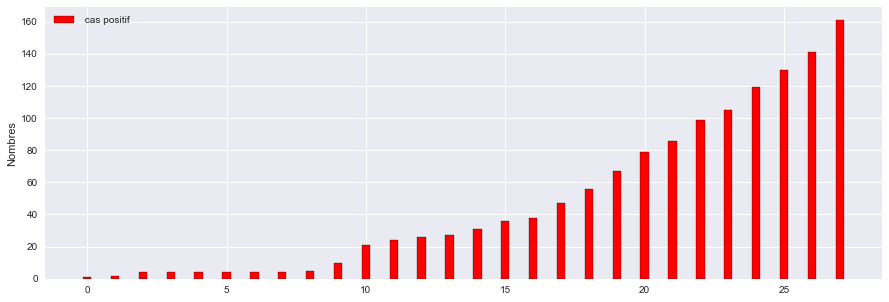

In [10]:
plt.figure(figsize=(15,5))
# width of the bars
barWidth = 0.3
# The x position of bars
r1 = np.arange(len(total_cases['Positif']))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1,total_cases['Positif'].cumsum(), width = barWidth, color = 'red', edgecolor = 'black', capsize=7, label=' cas positif')
 
# Create cyan bars
#plt.bar(r2, total.cumsum(), width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Nbr de Tests')
 
# general layout
#plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C'])
plt.ylabel('Nombres')
plt.legend()
 
# Show graphic
plt.show()

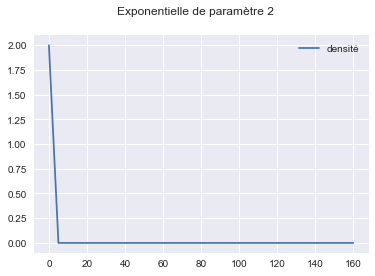

In [36]:

fig, ax=plt.subplots()
#echantillon de variables exponentielles de parametre 2:
X=expon.rvs(scale=0.5, size=10000)
#histogramme associe:
# The x position of bars
r1 = np.arange(len(total_cases['Positif']))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
#plt.bar(r1,total_cases['Positif'].cumsum(), width = barWidth, color = 'red', edgecolor = 'black', capsize=7, label=' cas positif')
 
#ax.hist(X,bins=30, density=True, label="histogramme")

fig.suptitle("Exponentielle de paramètre 2")
#densité de la loi associée:
x=np.arange(0,max(total_cases['Positif'].cumsum()), 5)
ax.plot(x,expon.pdf(x, scale=0.5), label="densité") 
ax.legend()
plt.show()

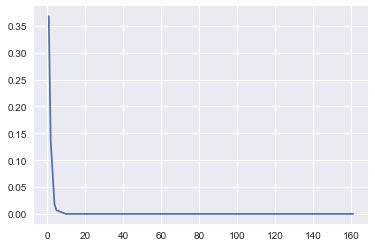

In [37]:
plt.plot(total_cases['Positif'].cumsum(), expon.pdf(total_cases['Positif'].cumsum()))

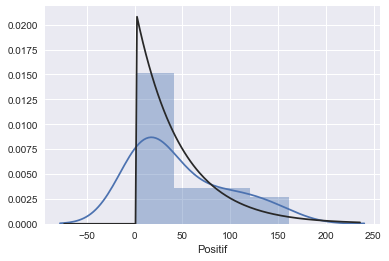

In [41]:
sns.distplot(total_cases['Positif'].cumsum(),fit =expon)

In [ ]:
plt.figure(figsize=(15,5))
# width of the bars
barWidth = 0.3
# The x position of bars
r1 = np.arange(len(total_cases['Positif']))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1,total_cases['Positif'].cumsum(), width = barWidth, color = 'red', edgecolor = 'black', capsize=7, label=' cas positif')
 
# Create cyan bars
plt.bar(r2, total.cumsum(), width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Nbr de Tests')
 
# general layout
#plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C'])
plt.ylabel('Nombres')
plt.legend()
 
# Show graphic
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
# width of the bars
barWidth = 0.3
# The x position of bars
r1 = np.arange(len(total_cases['Positif']))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1,total_cases['Positif'].cumsum(), width = barWidth, color = 'red', edgecolor = 'black', capsize=7, label=' cas positif')
 
# Create cyan bars
plt.bar(r2, total.cumsum(), width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Nbr de Tests')
 
# general layout
#plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C'])
plt.ylabel('Nombres')
plt.legend()
 
# Show graphic
plt.show()

In [ ]:
plt.figure(figsize= (15,5))
plt.plot(confirmed_cases, color = 'red', label = 'cas positif')
plt.xticks(rotation = 90)
plt.ylabel('Nombres')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize= (15,5))
plt.plot(np.log(confirmed_cases), color = 'red')
plt.xticks(rotation = 90)
plt.show()

# Modelisation

## Preparation des donnees

In [50]:
days_since = np.array([i for i in range(len(confirmed_cases))]).reshape(-1, 1)
senegal_cases = np.array(confirmed_cases).reshape(-1, 1)


In [51]:
days_since_cum = np.array([i for i in range(len(confirmed_cases.cumsum()))]).reshape(-1, 1)
senegal_cases_cum = np.array(confirmed_cases.cumsum()).reshape(-1, 1)



In [43]:
n = 10
days_in_future = n
future_forcast = np.array([i for i in range(len(confirmed_cases)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-n]


In [44]:
start = '03/03/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

In [45]:
## Split data train and test

In [46]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since, senegal_cases, test_size=0.25, shuffle=False) 

## SVM Model

In [47]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred2 = svm_confirmed.predict(X_test_confirmed)
svm_pred2
svm_pred = svm_confirmed.predict(future_forcast)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
test = confirmed_cases.iloc[14:19]
test.reset_index(level=0, inplace=True)
test['Date']
plt.figure(figsize=(15,5))
plt.plot(test['Date'],np.round(svm_pred2), color = 'blue', label = 'predictions')
plt.plot(test['Date'] ,y_test_confirmed, color = 'red', label = 'real')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(future_forcast_dates,svm_pred, color = 'blue', label = 'predictions')
#plt.plot(test['Date'] ,y_test_confirmed, color = 'red', label = 'real')
plt.xticks(rotation = 90)
plt.legend()
plt.show()


In [ ]:
# Future predictions using Linear Regression 
print('Support Vectors Machines  future predictions:')
set(zip(future_forcast_dates[-11:], np.round(svm_pred[-11:])))

## Bayesian Ridge

In [ ]:
# bayesian ridge 
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(X_train_confirmed, y_train_confirmed)

In [ ]:
bayesian_search.best_params_

In [ ]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

In [52]:

#test = confirmed_cases.iloc[14:19]
#test.reset_index(level=0, inplace=True)
test['Date']
plt.figure(figsize=(15,5))
plt.plot(test['Date'],np.round(test_bayesian_pred), color = 'blue', label = 'predictions')
plt.plot(test['Date'] ,y_test_confirmed, color = 'red', label = 'real')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

NameError: name 'test' is not defined

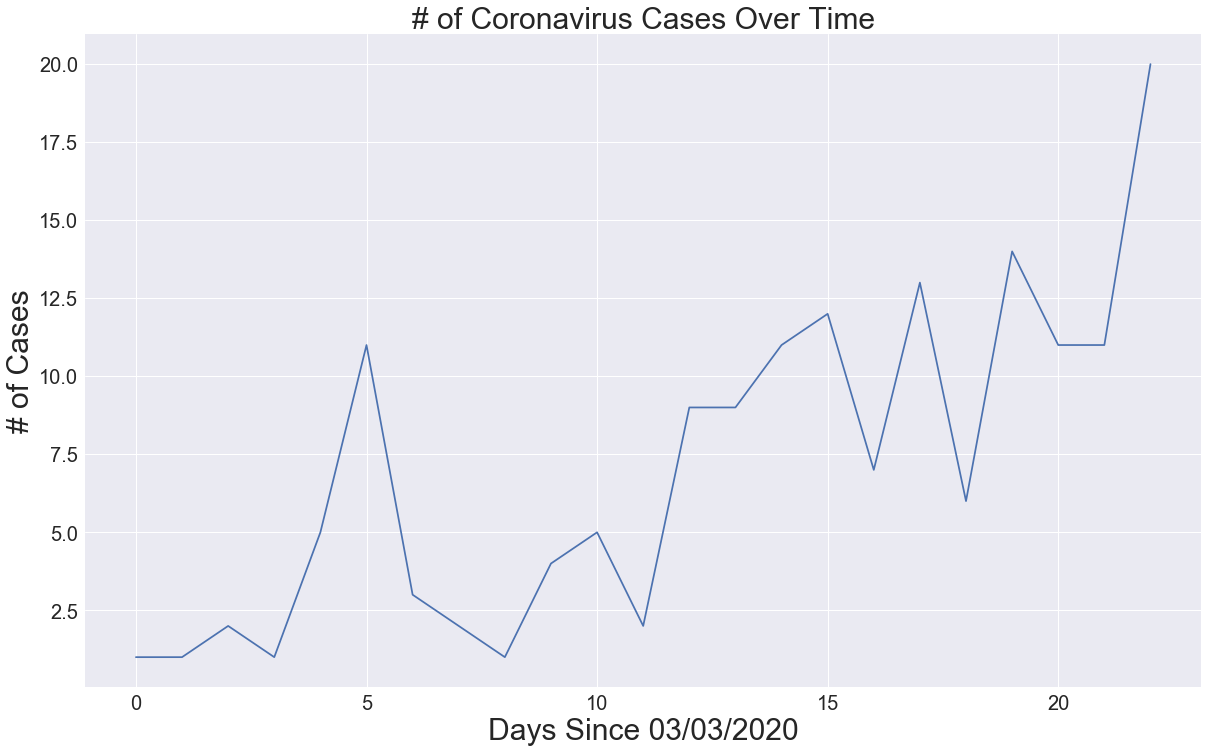

In [53]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, senegal_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 03/03/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

NameError: name 'bayesian_pred' is not defined

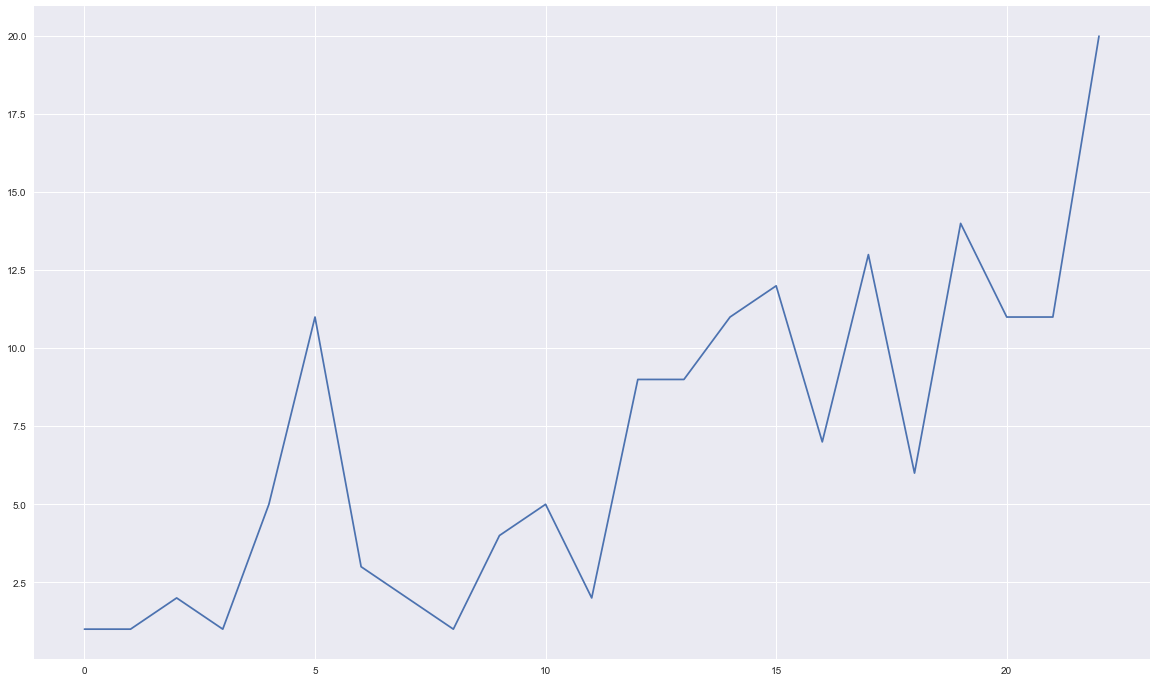

In [54]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, senegal_cases)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
# Future predictions using Linear Regression 
print('Ridge regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(bayesian_pred[-10:]) ))

# Temporel Series Model

## Modele ARIMA

In [ ]:
X = confirmed_cases
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [ ]:
plt.figure(figsize=(15,5))
pyplot.plot(X)
pyplot.xticks(rotation = 90)
pyplot.show()

In [ ]:
Y = confirmed_cases.values
#Y = confirmed_cases


train_size = int(len(Y) * 0.66)
train, test = Y[0:train_size], Y[train_size:len(Y)]
print('Observations: %d' % (len(Y)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))


In [ ]:
plt.figure(figsize=(15,5))
pyplot.plot(train)
pyplot.xticks(rotation = 90)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

In [ ]:

plt.figure(figsize=(15,5))
autocorrelation_plot(X)
pyplot.show()

In [ ]:
# fit model
model = ARIMA(X, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


In [ ]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
Xvalues = confirmed_cases.values
size = int(len(Xvalues) * 0.66)
train, test = Xvalues[0:size], Xvalues[size:len(Xvalues)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))


In [ ]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### Choose best parameters models ARIMA

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(X.values, p_values, d_values, q_values)

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 

In [ ]:
# load dataset


# evaluate parameters
p_values = [0, 1, 2, 4]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(X.values, p_values, d_values, q_values)

In [ ]:
Xvalues = confirmed_cases.values
size = int(len(Xvalues) * 0.66)
train, test = Xvalues[0:size], Xvalues[size:len(Xvalues)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Overview

This cheat sheet demonstrates 11 different classical time series forecasting methods; they are:

Autoregression (AR)
Moving Average (MA)
Autoregressive Moving Average (ARMA)
Autoregressive Integrated Moving Average (ARIMA)
Seasonal Autoregressive Integrated Moving-Average (SARIMA)
Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
Vector Autoregression (VAR)
Vector Autoregression Moving-Average (VARMA)
Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
Simple Exponential Smoothing (SES)
Holt Winter’s Exponential Smoothing (HWES)


# Autoregression (AR)

La méthode d'autorégression (AR) modélise la prochaine étape de la séquence en fonction linéaire des observations aux pas de temps précédents.
La notation du modèle implique de spécifier l'ordre du modèle p comme paramètre de la fonction AR, par ex. AR (p). 
Par exemple, AR (1) est un modèle d'autorégression de premier ordre.
La méthode convient aux séries chronologiques univariées sans tendance ni composantes saisonnières.


In [ ]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
data = confirmed_cases.values
size = int(len(data) * 0.66)
train, test = data[0:size], data[size:len(data)]
# fit model
AR_model = AR(data)
AR_model_fit = AR_model.fit()
# make prediction
yhat = AR_model_fit.predict(len(data), len(data))
print(yhat)

#model_fit.predict(1,1)

In [ ]:
# Future predictions using Linear Regression 
print('Model AR future predictions:')
set(zip(future_forcast_dates[23:23+7], np.round(AR_model_fit.predict(len(data),len(data)+6)) ))

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(future_forcast_dates[23:23+7], model_fit.predict(len(data),len(data)+6) )
plt.show()

# Moving Average (MA)


The moving average (MA) method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.
A moving average model is different from calculating the moving average of the time series.
The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.
The method is suitable for univariate time series without trend and seasonal components

La méthode de la moyenne mobile (MA) modélise la prochaine étape de la séquence en fonction linéaire des erreurs résiduelles d'un processus moyen à des pas de temps antérieurs.
Un modèle de moyenne mobile est différent du calcul de la moyenne mobile de la série chronologique.
La notation du modèle implique de spécifier l'ordre du modèle q en tant que paramètre de la fonction MA, par ex. MA (q). Par exemple, MA (1) est un modèle de moyenne mobile de premier ordre.
La méthode convient aux séries chronologiques univariées sans tendance ni composantes saisonnières

In [ ]:

# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
# fit model
MA_model = ARMA(data, order=(0, 1))
MA_model_fit = MA_model.fit(disp=False)
# make prediction
yhat = MA_model_fit.predict(len(data), len(data))
print(yhat)

In [ ]:
# Future predictions using Linear Regression 
print('Model MA future predictions:')
set(zip(future_forcast_dates[23:23+7], np.round(MA_model_fit.predict(len(data),len(data)+6)) ))

# Autoregressive Moving Average (ARMA)

La méthode de la moyenne mobile autorégressive (ARMA) modélise la prochaine étape de la séquence en fonction linéaire des observations et des erreurs résiudales aux pas de temps précédents.

Il combine à la fois les modèles d'autorégression (AR) et de moyenne mobile (MA).

La notation du modèle implique de spécifier l'ordre des modèles AR (p) et MA (q) en tant que paramètres d'une fonction ARMA, par ex. ARMA (p, q). Un modèle ARIMA peut être utilisé pour développer des modèles AR ou MA.

La méthode convient aux séries chronologiques univariées sans tendance ni composantes saisonnières

In [ ]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
# fit model
ARMA_model = ARMA(data, order=(2, 1))
ARMA_model_fit = ARMA_model.fit(disp=False)
# make prediction
yhat = ARMA_model_fit.predict(len(data), len(data))
print(yhat)


In [ ]:
# Future predictions using Linear Regression 
print('Model ARMA future predictions:')
set(zip(future_forcast_dates[23:23+7], np.round(ARMA_model_fit.predict(len(data),len(data)+6)) ))

# Seasonal Autoregressive Integrated Moving-Average (SARIMA)

La méthode SARIMA (Seasonal Autoregressive Integrated Moving Average) modélise la prochaine étape de la séquence en fonction linéaire des observations différenciées, des erreurs, des observations saisonnières différenciées et des erreurs saisonnières aux pas de temps précédents.

Il combine le modèle ARIMA avec la possibilité d'effectuer la même autorégression, différenciation et modélisation de la moyenne mobile au niveau saisonnier.

La notation du modèle implique de spécifier l'ordre des modèles AR (p), I (d) et MA (q) comme paramètres d'une fonction ARIMA et AR (P), I (D), MA (Q) et m paramètres au niveau saisonnier, par exemple SARIMA (p, d, q) (P, D, Q) m où «m» est le nombre de pas de temps dans chaque saison (la période saisonnière). Un modèle SARIMA peut être utilisé pour développer des modèles AR, MA, ARMA et ARIMA.

La méthode convient aux séries chronologiques univariées avec des composantes de tendance et / ou saisonnières.


In [ ]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
#data = [x + random() for x in range(1, 100)]
# fit model
SARIMAX_model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
SARIMAX_model_fit = SARIMAX_model.fit(disp=False)
# make prediction
yhat = SARIMAX_model_fit.predict(len(data), len(data))
print(yhat)

In [ ]:
# Future predictions using Linear Regression 
print('Model SARIMAX future predictions:')
set(zip(future_forcast_dates[23:23+7], np.round(SARIMAX_model_fit.predict(len(data),len(data)+6)) ))

# Multivariate time Series Model

## Vector Autoregression (VAR)

In [ ]:
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
# contrived dataset with dependency
data = pd.concat([confirmed_cases, total], axis=1)
# fit model
model = VAR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

In [ ]:
base_predict = pd.DataFrame({
                    'Date' : future_forcast_dates[-7:],
                    'Bayesian': np.round(bayesian_pred[-7:]),
                    'AR_model':np.round(AR_model_fit.predict(len(data),len(data)+6)),
                    'MA_model': np.round(MA_model_fit.predict(len(data),len(data)+6)),
                    'ARMA_model' : np.round(ARMA_model_fit.predict(len(data),len(data)+6)),
                    'SARIMAX': np.round(SARIMAX_model_fit.predict(len(data),len(data)+6)), 
                    'Real_value': [6,14,11,12,0,0,0]


})
    
base_predict
            

In [ ]:
base_predict1 = pd.DataFrame({
                    'Date' : future_forcast_dates[-9:],
                    #'Model_1': np.round(bayesian_pred[-7:]),
                    #'Com_Model_1': np.round(bayesian_pred[-7:]) - [6,14,11,12,20,13,0] ,
    
                    #'Model_2':np.round(AR_model_fit.predict(len(data),len(data)+6)),
                    #'Com_Model_2' : np.round(AR_model_fit.predict(len(data),len(data)+6))- [6,14,11,12,20,13,0] ,
                    
                    #'Model_3': np.round(MA_model_fit.predict(len(data),len(data)+6)),
                    #'Com_Model_3': np.round(MA_model_fit.predict(len(data),len(data)+6))- [6,14,11,12,0,0,0] ,
    
    
                    #'Model_4' : np.round(ARMA_model_fit.predict(len(data),len(data)+6)),
                    #'Com_Model_4': np.round(ARMA_model_fit.predict(len(data),len(data)+6))- [6,14,11,12,0,0,0] ,

                    #'Model_5': np.round(SARIMAX_model_fit.predict(len(data),len(data)+6)), 
                    #'Com_Model_5': np.round(SARIMAX_model_fit.predict(len(data),len(data)+6))- [6,14,11,12,0,0,0] ,

    
                    #'Real_value': [6,14,11,12,20,13,0]


})
    
base_predict1

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

START_DATE = {
    'Burkina Faso': '10/03/20',
    'Benin': '16/03/20',
    #'Cote Ivoire': '1/22/20',
    'Cabo Verde': '20/03/20',
    'Ghana' :  '14/03/20'   ,
    'Gambia':'17/03/20'  ,
    'Guinea':'13/03/20'  ,
    'Guinea-Bissau': '25/03/20'  ,
    'Liberia': '16/03/20'  ,
    'Mali': '25/03/20'  ,
    'Niger': '20/03/20'  ,
    'Nigeria': '28/02/20'  ,
    #'Sierra Leone':'20/03/20'  ,
    'Senegal': '02/03/20'  ,
    'Togo': '06/03/20'  ,
}

class Learner(object):
    def __init__(self, country, loss):
        self.country = country
        self.loss = loss

    def load_confirmed(self, country):
      """
      Load confirmed cases downloaded from HDX
      """
      df = pd.read_csv('dailycasenumber_oa.csv', sep =',')
      country_df = df[df['Country/Region'] == country]
      return country_df.iloc[0].loc[START_DATE[country]:]

    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    

In [ ]:
def predict(self, beta, gamma, data):
        """
        Predict how the number of people in each compartment can be changed through time toward the future.
        The model is formulated with the given beta and gamma.
        """
        predict_range = 150
        new_index = self.extend_index(data.index, predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        return new_index, extended_actual, solve_ivp(SIR, [0, size], [S_0,I_0,R_0], t_eval=np.arange(0, size, 1))

def train(self):
        """
        Run the optimization to estimate the beta and gamma fitting the given confirmed cases.
        """
        data = self.load_confirmed(self.country)
        optimal = minimize(
            loss,
            [0.001, 0.001],
            args=(data),
            method='L-BFGS-B',
            bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
        )
        beta, gamma = optimal.x
        new_index, extended_actual, prediction = self.predict(beta, gamma, data)
        df = pd.DataFrame({
            'Actual': extended_actual,
            'S': prediction.y[0],
            'I': prediction.y[1],
            'R': prediction.y[2]
        }, index=new_index)
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title(self.country)
        df.plot(ax=ax)
        fig.savefig(f"{self.country}.png")

In [ ]:
def loss(point, data):
    """
    RMSE between actual confirmed cases and the estimated infectious people with given beta and gamma.
    """
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [S_0,I_0,R_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))

In [ ]:
def loss(point, data, recovered):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [S_0,I_0,R_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    # Put more emphasis on recovered people
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2